# Example using Dyslexia pipeline

This notebook show some example how to use the dyslexia pipeline with `get_results(fpath)` function

## import packages

In [29]:
import requests
import io
from dyslexia.app import get_results
from dyslexia.io import load_image, load_image_from_url
from dyslexia.plots import plot_image
import time
import gc

## Try on image from file

<strong style='color:red'>Warning</strong>: Be sure that your image is well rotated

In [30]:
fpath = '../Exemples/Dictee/dictee_example_nb.jpg'

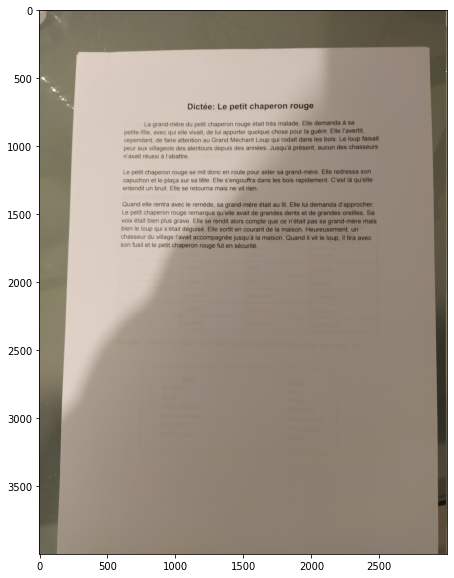

In [31]:
img = load_image(fpath)
plot_image(img)

In [32]:
%%time
res = get_results(fpath)

Wall time: 26.1 s


In [33]:
txt = '\n'.join(res['paragraphs'])
print(txt)

Dictée: Le petit chaperon rouge 
L ec EN t Ln e ETE O n r e S e p L el RE L C EN L LI e e e OIUE V e OO N A E MP R SIRRE L e f R CRR TRN UO TRI RE e e TT e A e eN N dl l 1LR N 00 CR TO e F 1ES: T L T T Le T MLEN CO e MIOU EN LS e AN T MIS A E T e (R e A RIU E 
n'avait réussi à l’abattre. 
L e e e eN dl e T TON CT =1l e le1e en rn R 1( p 20 1e=1005E: MEn p e e e S e e E e E R S e e E e Mo T do EM e 1e1fe [T 710 OSN e 1VR ( 
entendit un bruit. Elle se retourna mais ne vit rien. 
Quand elle rentra avec le remède, sa grand-mère était au lit. Elle lui demanda d'approcher. Le petit chaperon rouge remarqua qu'elle avait de grandes dents et de grandes oreilles. Sa voix était bien plus grave. Elle se rendit alors compte que ce n’était pas sa grand-mère mais bien le loup qui s’était déguisé. Elle sortit en courant de la maison. Heureusement, un chasseur du village l’avait accompagnée jusqu'à la maison. Quand il vit le O SOR (TeR:NTe L d t TN PR IR IERE 


In [34]:
res['bboxes']

[(1112, 692, 2037, 752),
 (614, 819, 2516, 1054),
 (639, 1060, 1119, 1100),
 (633, 1173, 2468, 1292),
 (631, 1296, 1625, 1338),
 (614, 1412, 2497, 1765)]

## Try it on an url

In [35]:
url = 'https://docplayer.fr/docs-images/46/21123605/images/page_20.jpg'

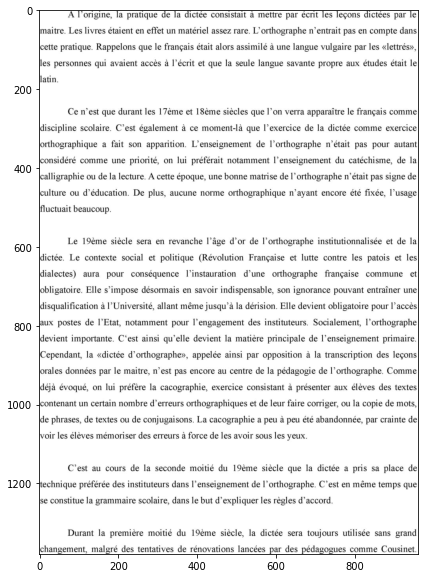

In [36]:
img = load_image_from_url(url)
plot_image(img)

In [26]:
%%time
res = get_results(url)

Wall time: 48.9 s


In [27]:
txt = '\n'.join(res['paragraphs'])
print(txt)

A l’origine, la pratique de la dictée consistait à mettre par écrit les leçons dictées par le maitre. Les livres étaient en effet un matériel assez rare. L’orthographe n’entrait pas en compte dans cette pratique. Rappelons que le français était alors assimilé à une langue vulgaire par les «lettrés», les personnes qui avaient accès à l’écrit et que la seule langue savante propre aux études était le 
LÉTTLS 
Ce n’est que durant les 17ème et 18ème siècles que l’on verra apparaître le français comme discipline scolaire. C’est également à ce moment-là que l’exercice de la dictée comme exercice orthographique a fait son apparition. L’enseignement de l’orthographe n’était pas pour autant P LR E e r T M rr sC e r MS LS T MSs S UESL TS RR EN calligraphie ou de la lecture. À cette époque, une bonne matrise de l’orthographe n’était pas signe de culture ou d’éducation. De plus, aucune norme orthographique n’ayant encore été fixée, l’usage 
LS ESL EU 0 
Le 19ème siècle sera en revanche l’âge d’or d

In [28]:
res['bboxes']

[(3, 2, 957, 148),
 (3, 166, 48, 184),
 (3, 248, 958, 476),
 (2, 490, 187, 521),
 (3, 576, 958, 1051),
 (2, 1069, 679, 1092),
 (2, 1152, 957, 1215),
 (3, 1233, 744, 1256),
 (3, 1316, 956, 1379)]

## Try an error

### Image is blurry

In [38]:
fpath = '../Exemples/Histoire_Geo/IMG_20210329_122940.jpg'

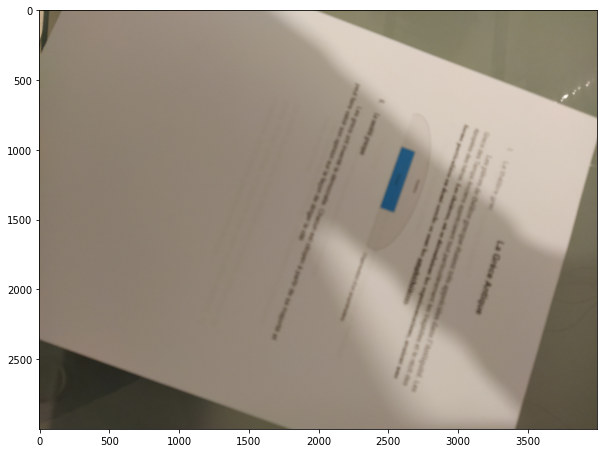

In [39]:
img = load_image(fpath)
plot_image(img)

In [42]:
%%time
res = get_results(fpath)

Wall time: 4.56 s


In [43]:
res

{'error': {'code': 'IMAGE_BLURRY',
  'message': 'The image sent by the user is considered to be blurry'}}

### Image with no text

In [14]:
%env TESSDATA_PREFIX C:/Users/arthu/Travail/DataForGood/tessdata

env: TESSDATA_PREFIX=C:/Users/arthu/Travail/DataForGood/tessdata


In [15]:
url = 'https://cdn.icon-icons.com/icons2/1380/PNG/512/vcsconflicting_93497.png'

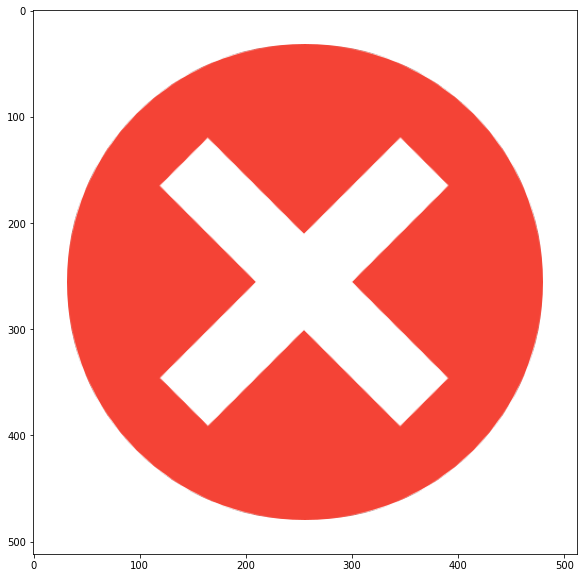

In [16]:
img = load_image_from_url(url)
plot_image(img)

In [17]:
%%time
res = get_results(url)

Wall time: 1.22 s


In [18]:
res

{'error': {'code': 'NO_TEXT_FOUND',
  'message': 'The OCR model did not found any french word inside the image'}}